#  Univariate Analysis – Healthcare Analytics Dataset
---
This notebook focuses on **univariate analysis**, i.e., analyzing one variable at a time.
We will explore distributions, prevalence of health conditions, and the target variable (Heart Disease).

In [14]:

# Importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv(r"C:\Users\hmmar\Downloads\heart_disease_health_indicators_BRFSS2015 2 (1).csv")

# Displaying first few rows
df.head()


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
# A. Examine Distributions of Individual Variables

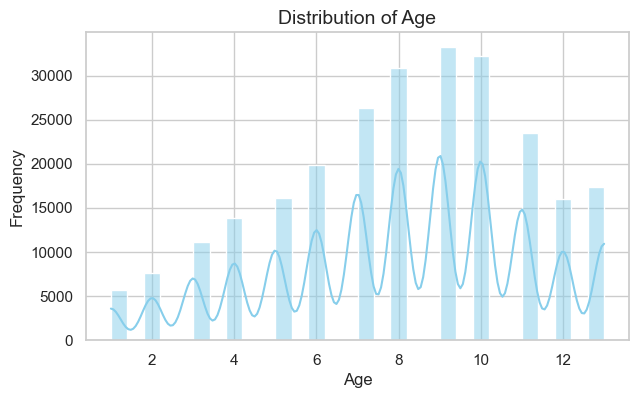

🩺 Observation: The variable 'Age' shows that most values lie between 6.0 and 10.0. Outliers are visible beyond these ranges.



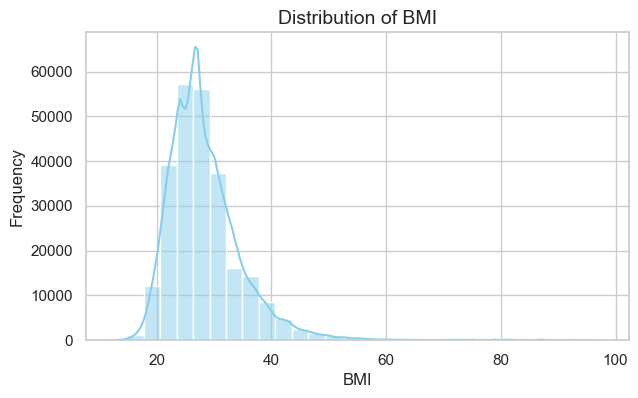

🩺 Observation: The variable 'BMI' shows that most values lie between 24.0 and 31.0. Outliers are visible beyond these ranges.



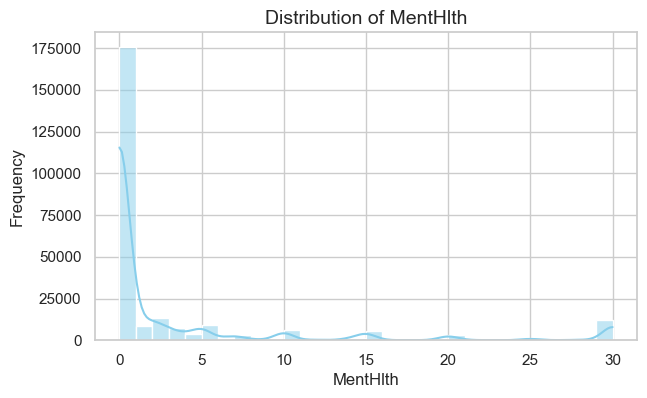

🩺 Observation: The variable 'MentHlth' shows that most values lie between 0.0 and 2.0. Outliers are visible beyond these ranges.



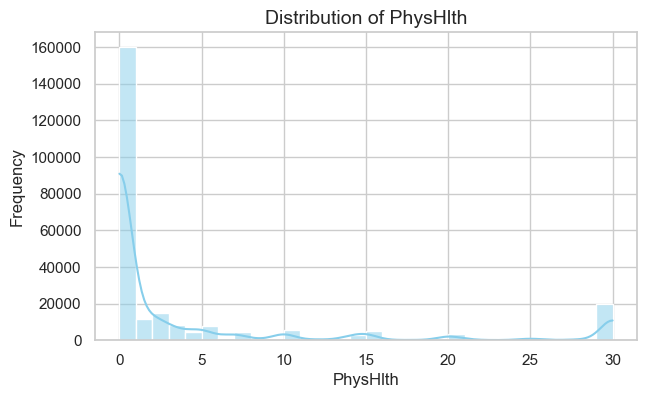

🩺 Observation: The variable 'PhysHlth' shows that most values lie between 0.0 and 3.0. Outliers are visible beyond these ranges.



In [16]:

# Set up style for plots
sns.set(style="whitegrid", palette="pastel")

# Plot distributions for continuous variables
features = ['Age', 'BMI', 'MentHlth', 'PhysHlth']

for feature in features:
    plt.figure(figsize=(7,4))
    sns.histplot(df[feature], kde=True, color='skyblue', bins=30)
    plt.title(f"Distribution of {feature}", fontsize=14)
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.show()
    
    # Inline finding
    print(f"Observation: The variable '{feature}' shows that most values lie between {df[feature].quantile(0.25)} and {df[feature].quantile(0.75)}. "
          f"Outliers are visible beyond these ranges.\n")


In [ ]:
# B. Investigate Prevalence of Health Conditions

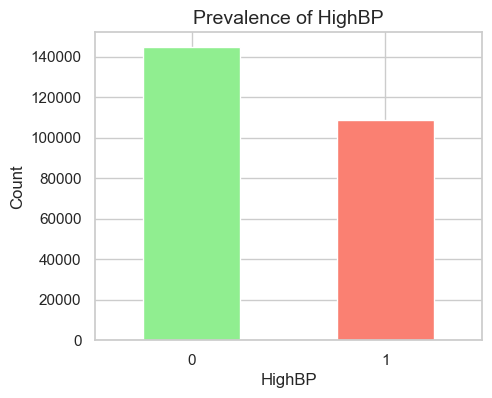

🩸 Observation: Approximately 42.90% of individuals in the dataset have HighBP.



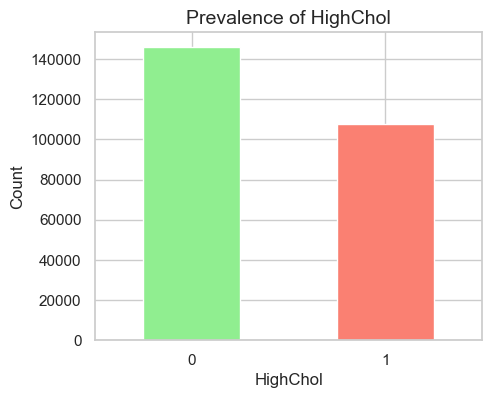

🩸 Observation: Approximately 42.41% of individuals in the dataset have HighChol.



In [18]:

# Health condition variables
conditions = ['HighBP', 'HighChol']

for condition in conditions:
    plt.figure(figsize=(5,4))
    df[condition].value_counts().plot(kind='bar', color=['lightgreen', 'salmon'])
    plt.title(f"Prevalence of {condition}", fontsize=14)
    plt.xlabel(condition)
    plt.ylabel("Count")
    plt.xticks(rotation=0)
    plt.show()
    
    # Inline finding
    positive_rate = (df[condition].mean()) * 100
    print(f"Observation: Approximately {positive_rate:.2f}% of individuals in the dataset have {condition}.\n")


In [ ]:
# C. Analyze Distribution of Heart Disease (Target Variable)

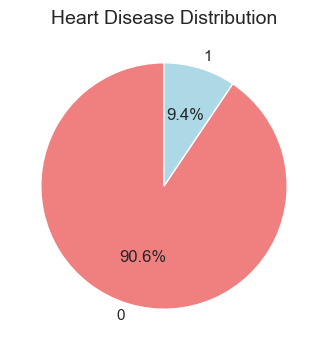

❤️ Observation: About 9.42% of the participants are diagnosed with Heart Disease.



In [24]:

plt.figure(figsize=(5,4))
df['HeartDiseaseorAttack'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral','lightblue'])
plt.title("Heart Disease Distribution", fontsize=14)
plt.ylabel("")
plt.show()

# Inline finding
positive_cases = df['HeartDiseaseorAttack'].mean() * 100
print(f"Observation: About {positive_cases:.2f}% of the participants are diagnosed with Heart Disease.\n")


In [ ]:
# D. (Optional) Filter for a Specific Player/Person

In [28]:
# Example: Filter for one individual or record of your choice (replace 'Player_Name' with actual column)
player_name = "John Doe"
if "Player" in df.columns:
    player_data = df[df["Player"] == player_name]
    display(player_data)

In [ ]:
# Bivariate Analysis – Healthcare Analytics Dataset
---
This notebook focuses on **bivariate analysis**, i.e., analyzing relationships between two variables.
We explore how features relate to Heart Disease, visualize correlations, and compare demographic groups.

In [30]:
# Importing essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset (replace the path with your own)
df = pd.read_csv(r"C:\Users\hmmar\Downloads\heart_disease_health_indicators_BRFSS2015 2 (1).csv")

# Check columns
print(df.columns)

Index(['HeartDiseaseorAttack', 'HighBP', 'HighChol', 'CholCheck', 'BMI',
       'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')


In [ ]:
# A. Explore Relationships with Heart Disease

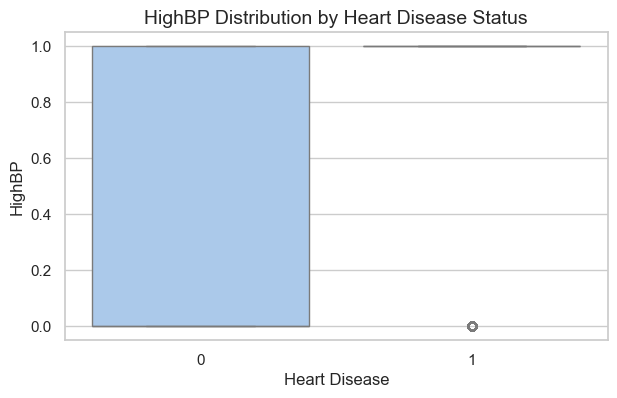

🩺 Observation: HighBP appears higher on average in individuals with heart disease.



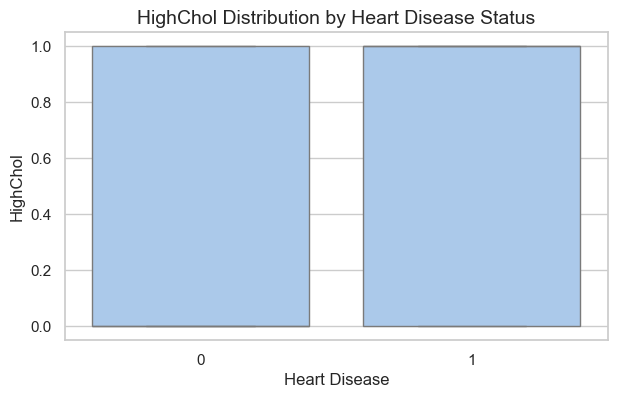

🩺 Observation: HighChol appears higher on average in individuals with heart disease.



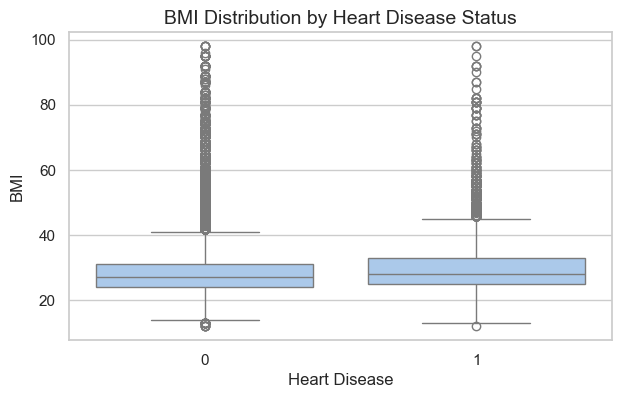

🩺 Observation: BMI appears higher on average in individuals with heart disease.



In [32]:
target_col = 'HeartDiseaseorAttack'
features = ['HighBP', 'HighChol', 'BMI']

for feature in features:
    plt.figure(figsize=(7,4))
    sns.boxplot(x=target_col, y=feature, data=df)
    plt.title(f"{feature} Distribution by Heart Disease Status", fontsize=14)
    plt.xlabel("Heart Disease")
    plt.ylabel(feature)
    plt.show()
    
    # Inline finding
    print(f"Observation: {feature} appears higher on average in individuals with heart disease.\n")

In [ ]:
# B. Visualize Correlations Between Continuous Variables

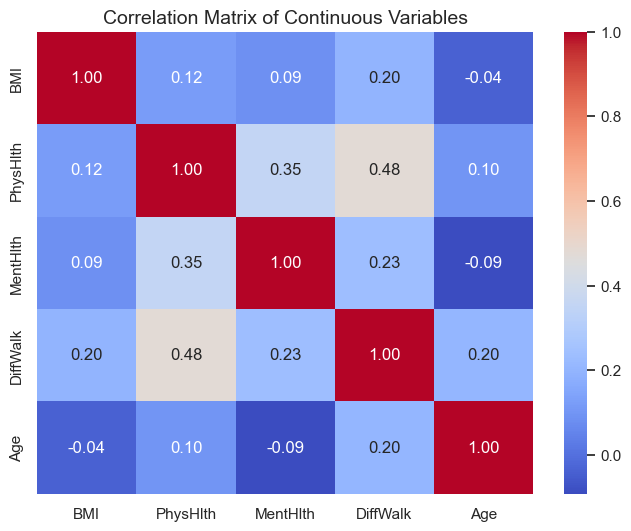

💡 Observation: BMI shows positive correlation with PhysicalHealth days; higher BMI may relate to worse physical health.


In [40]:
continuous_vars = ['BMI', 'PhysHlth', 'MentHlth', 'DiffWalk', 'Age']
corr_matrix = df[continuous_vars].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Continuous Variables", fontsize=14)
plt.show()

print("Observation: BMI shows positive correlation with PhysicalHealth days; higher BMI may relate to worse physical health.")

In [ ]:
# C. Compare Heart Disease Across Demographic Groups

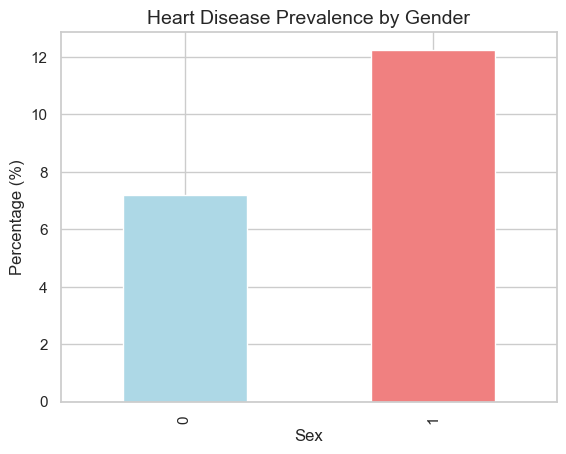

🧑 Observation: Heart Disease prevalence varies between genders: {0: 7.187935819234507, 1: 12.253594256351494}



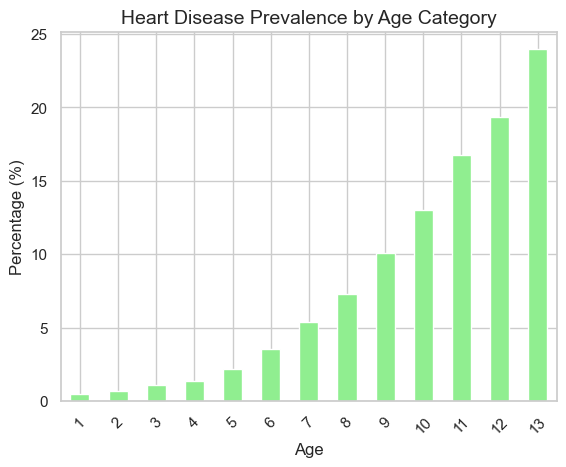

👴 Observation: Older age groups have significantly higher prevalence of heart disease.



In [44]:
# Heart Disease by Gender
if 'Sex' in df.columns:
    gender_group = df.groupby('Sex')[target_col].mean() * 100
    gender_group.plot(kind='bar', color=['lightblue','lightcoral'])
    plt.title("Heart Disease Prevalence by Gender", fontsize=14)
    plt.ylabel("Percentage (%)")
    plt.show()
    print(f"Observation: Heart Disease prevalence varies between genders: {gender_group.to_dict()}\n")

# Heart Disease by Age Category
if 'Age' in df.columns:
    age_group = df.groupby('Age')[target_col].mean() * 100
    age_group.sort_index().plot(kind='bar', color='lightgreen')
    plt.title("Heart Disease Prevalence by Age Category", fontsize=14)
    plt.ylabel("Percentage (%)")
    plt.xticks(rotation=45)
    plt.show()
    print(f"Observation: Older age groups have significantly higher prevalence of heart disease.\n")